In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#renaming the columns
df.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income',
                      'City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [9]:
a=pd.Series(df['Taxable_Income'])
lst=[]
for i in a:
    x='Good' if i<=30000 else 'Risky'
    lst.append(x)
print(lst)   

['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky'

In [10]:
a=pd.DataFrame(lst)

In [11]:
df['Tax_Inc']=a

In [12]:
df.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,Tax_Inc
0,68833,50047,10,0,0,1,1,Risky
1,33700,134075,18,1,0,0,1,Risky
2,36925,160205,30,0,1,0,1,Risky
3,50190,193264,15,1,0,1,1,Risky
4,81002,27533,28,0,1,0,0,Risky


In [13]:
df=df.drop(columns=['Taxable_Income'],axis=1)

In [14]:
df.head()

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,Tax_Inc
0,50047,10,0,0,1,1,Risky
1,134075,18,1,0,0,1,Risky
2,160205,30,0,1,0,1,Risky
3,193264,15,1,0,1,1,Risky
4,27533,28,0,1,0,0,Risky


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Tax_Inc']=label_encoder.fit_transform(df['Tax_Inc'])
df.head()

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,Tax_Inc
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1


In [17]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df = norm_func(df.iloc[:,:])
df.head()

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,Tax_Inc
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [18]:
X=df.drop(columns=['Tax_Inc'],axis=1)
y=df['Tax_Inc']

In [19]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria C5.0

In [58]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [59]:
X.columns

Index(['City_Population', 'Work_Experience', 'Undergrad_YES',
       'Marital_Status_Married', 'Marital_Status_Single', 'Urban_YES'],
      dtype='object')

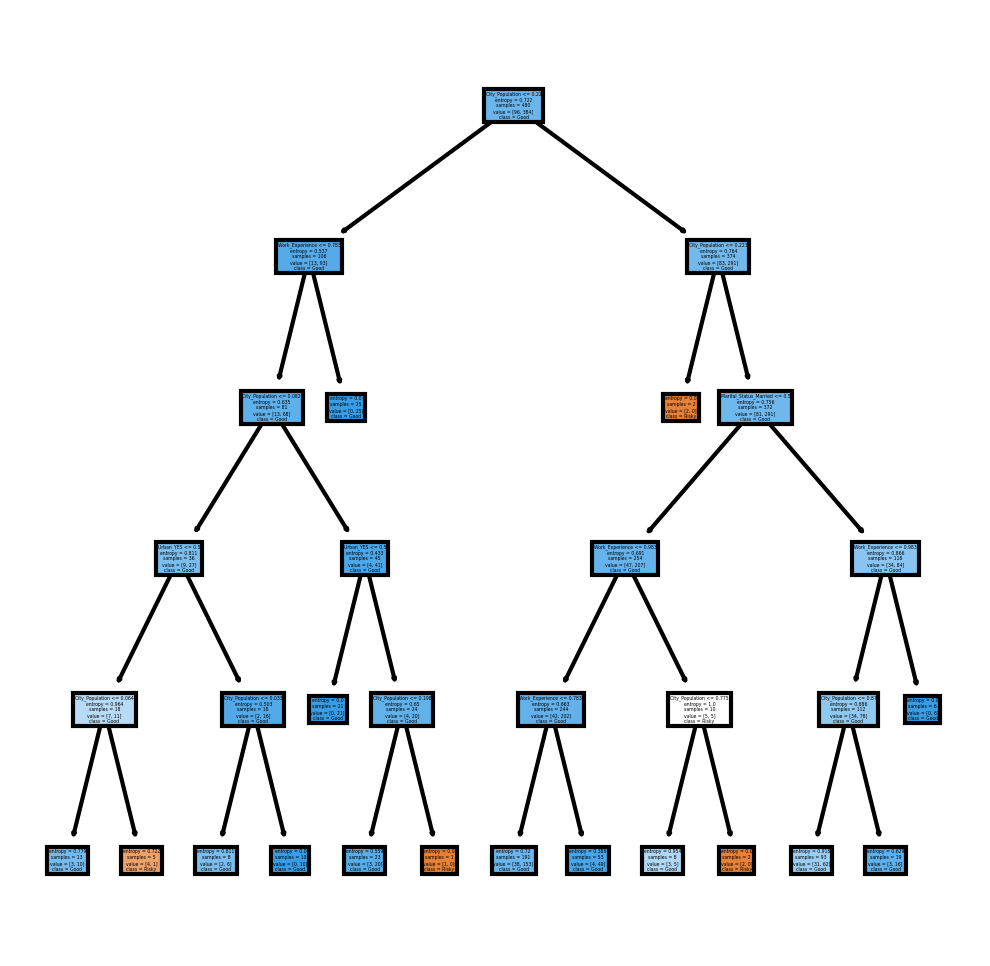

In [60]:
fn=['City_Population', 'Work_Experience', 'Undergrad_YES',
       'Marital_Status_Married', 'Marital_Status_Single', 'Urban_YES']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [61]:
ypred=model.predict(X_test)
ypred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[ 1, 27],
       [ 2, 90]], dtype=int64)

In [63]:
model.score(X_test,y_test)

0.7583333333333333

In [64]:
model.score(X_train,y_train)

0.8166666666666667

# Building Decision Tree Classifier using CART

In [68]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [69]:
ypred=model1.predict(X_test)
ypred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [70]:
model1.score(X_test,y_test)

0.7583333333333333

In [71]:
model1.score(X_train,y_train)

0.8166666666666667